In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

In [123]:
def attention(q, k, v):
    embed_dim = q.shape[-1]
    k_t = k.transpose(-1, -2)
    # return F.softmax((q @ k_t) / math.sqrt(embed_dim), dim=-1) @ v
    return F.softmax(((q @ k_t) / math.sqrt(embed_dim) @ v), dim=-1)

In [137]:
D_MODEL = 4
SEQ_LEN = 2
N = 1  # batch size
N_HEADS = 2

In [138]:
D_HEAD = D_MODEL // N_HEADS

In [139]:
x = torch.rand(N, SEQ_LEN, D_MODEL)  # abstraia x embedado
print('X shape: ', x.shape)
x

X shape:  torch.Size([1, 2, 4])


tensor([[[0.8868, 0.0460, 0.0207, 0.3889],
         [0.9782, 0.6360, 0.4089, 0.6682]]])

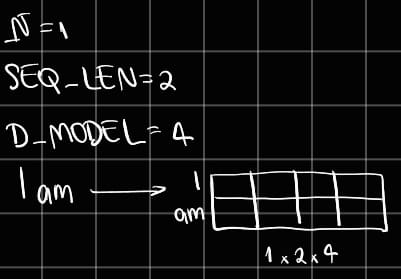

In [140]:
x = nn.Linear(D_MODEL, D_MODEL)(x)  # x projeção w_i (w_q, w_k, w_v)
x 

tensor([[[-0.0599,  0.0311, -0.4342, -0.2172],
         [-0.2252,  0.1791, -0.4219,  0.0106]]], grad_fn=<ViewBackward0>)

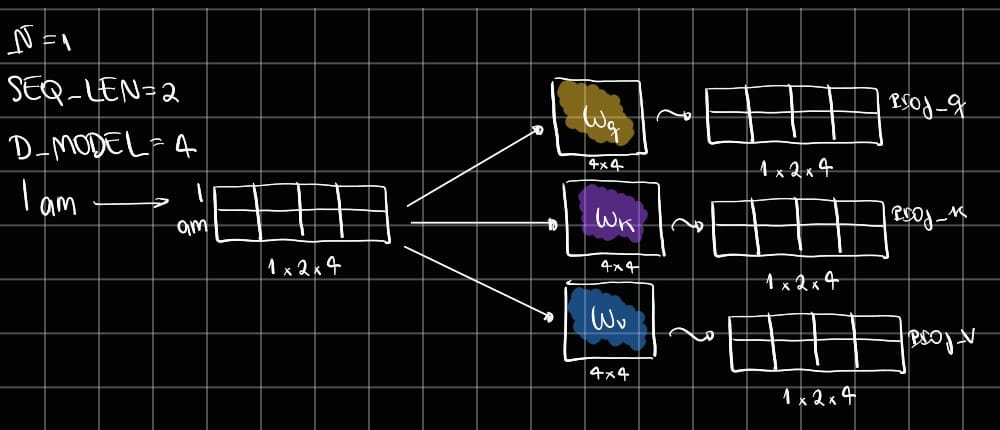

In [141]:
# Depois precisamos mexer em x (proj_i: q, k, v) para fazer a atenção multihead
x = x.contiguous().view((N, SEQ_LEN, N_HEADS, D_HEAD)).transpose(1, 2)
print('X shape:', x.shape)
x

X shape: torch.Size([1, 2, 2, 2])


tensor([[[[-0.0599,  0.0311],
          [-0.2252,  0.1791]],

         [[-0.4342, -0.2172],
          [-0.4219,  0.0106]]]], grad_fn=<TransposeBackward0>)

In [142]:
x = x.contiguous().view((N * N_HEADS, SEQ_LEN, D_HEAD))
print('X shape:', x.shape)
x

X shape: torch.Size([2, 2, 2])


tensor([[[-0.0599,  0.0311],
         [-0.2252,  0.1791]],

        [[-0.4342, -0.2172],
         [-0.4219,  0.0106]]], grad_fn=<ViewBackward0>)

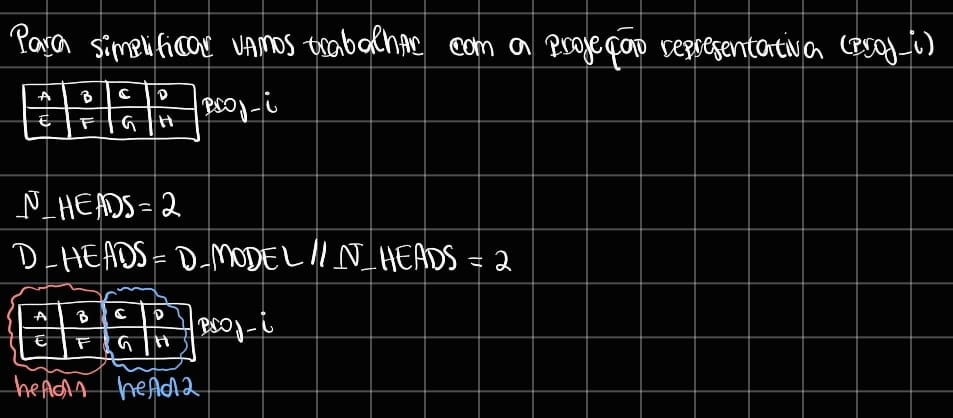

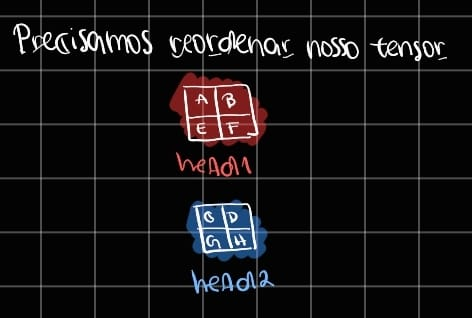

In [143]:
x_att = attention(x, x, x)
print('X shape: ', x.shape)
x_att

X shape:  torch.Size([2, 2, 2])


tensor([[[0.4986, 0.5014],
         [0.4938, 0.5062]],

        [[0.4771, 0.5229],
         [0.4795, 0.5205]]], grad_fn=<SoftmaxBackward0>)

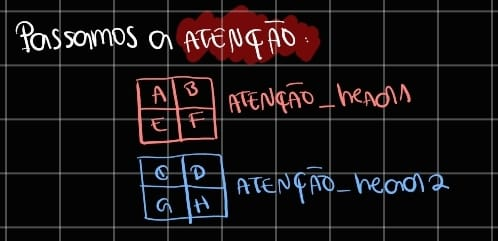

In [144]:
# metodo chary
x_multihead = x_att.contiguous().view((-1, N_HEADS, SEQ_LEN, D_HEAD)).transpose(1, 2)
print('x:', x_multihead.shape)
x_multihead

x: torch.Size([1, 2, 2, 2])


tensor([[[[0.4986, 0.5014],
          [0.4771, 0.5229]],

         [[0.4938, 0.5062],
          [0.4795, 0.5205]]]], grad_fn=<TransposeBackward0>)

In [145]:
x_multihead = x_multihead.contiguous().view((-1, SEQ_LEN, D_MODEL))
print('x:', x_multihead.shape)
x_multihead

x: torch.Size([1, 2, 4])


tensor([[[0.4986, 0.5014, 0.4771, 0.5229],
         [0.4938, 0.5062, 0.4795, 0.5205]]], grad_fn=<ViewBackward0>)

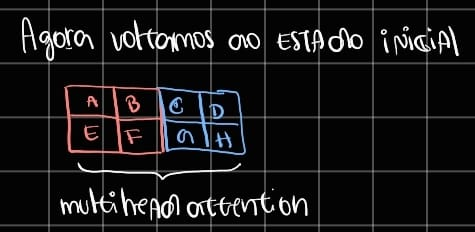